<a href="https://colab.research.google.com/github/peibanlioulang/Data-Analysis-Project/blob/main/TitanicSurvivalPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic - Machine Learning from Disaster**
Start here! Predict survival on the Titanic and get familiar with ML basics


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read training dataset

train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TitanicData/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TitanicData/test.csv')

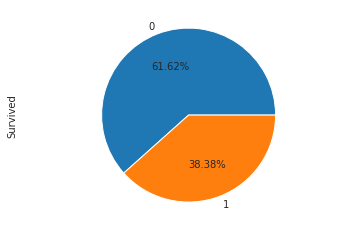

In [4]:
# Plot the survival rate
sns.set_style('ticks')
plt.axis('equal')
train_data['Survived'].value_counts().plot.pie(autopct = '%1.2f%%')

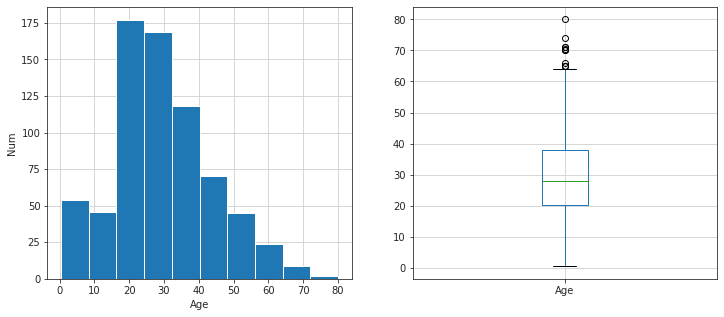

In [5]:
# Analysis survival rate according to age and gender
# Age distribution

train_data_age = train_data[train_data['Age'].notnull()]

plt.figure(figsize=(12,5))
plt.subplot(121)
train_data_age['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Num')

plt.subplot(122)
train_data.boxplot(column='Age')

In [11]:
train_data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64


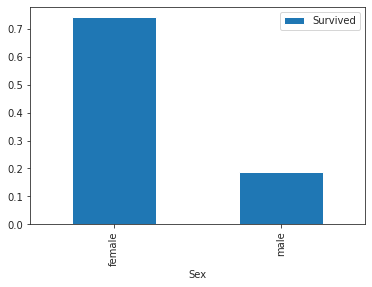

In [9]:
# male and female rate

train_data[['Sex','Survived']].groupby('Sex').mean().plot.bar()

survive_sex = train_data.groupby(['Sex','Survived'])['Survived'].count()

print(survive_sex)

In [12]:
print('Female survival rate: %.2f%%, Male survival rate: %.2f%%' %(survive_sex.loc['female',1]/survive_sex.loc['female'].sum()*100,survive_sex.loc['male',1]/survive_sex.loc['male'].sum()*100))

Female survival rate: 74.20%, Male survival rate: 18.89%


Text(0.5, 1.0, 'Sex and Age vs Surviced')

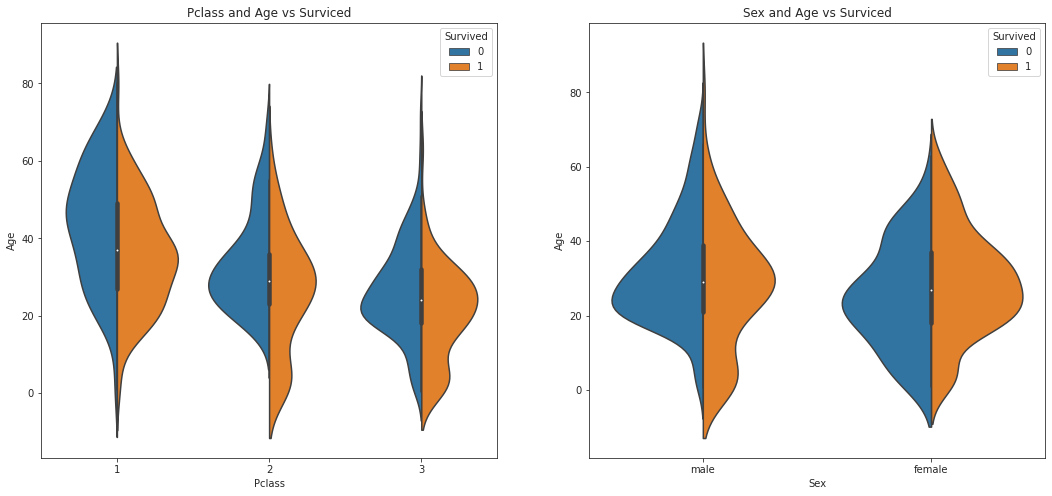

In [18]:
# Relationshiop between age and survival rate

fig,ax = plt.subplots(1,2,figsize =(18,8))

sns.violinplot('Pclass','Age', hue='Survived', data = train_data_age,split = True, ax = ax[0]) 
ax[0].set_title('Pclass and Age vs Surviced')

sns.violinplot('Sex','Age', hue='Survived', data = train_data_age,split = True, ax = ax[1])
ax[1].set_title('Sex and Age vs Surviced') 



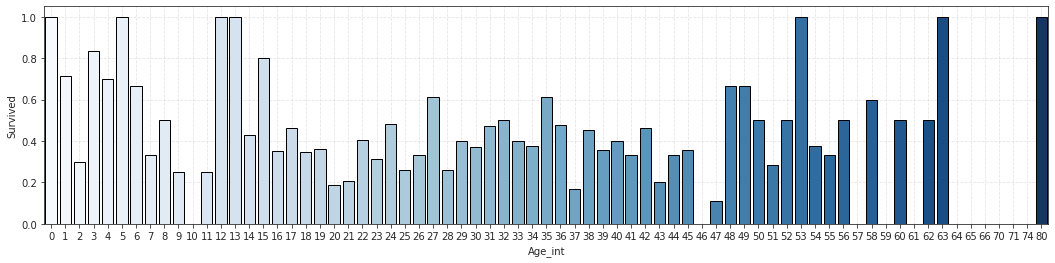

In [22]:
# Check the survival rate of kids and elders

plt.figure(figsize=(18,4))

train_data_age['Age_int'] = train_data_age['Age'].astype(np.int)
average_age = train_data_age[['Age_int','Survived']].groupby('Age_int',as_index = False).mean()
sns.barplot(x ='Age_int',y='Survived',data=average_age, palette='Blues',edgecolor = "black")
plt.grid(linestyle = '--',alpha =0.5)

In [24]:
# Relationship between relative and survival rate

sibsp_df = train_data[train_data['SibSp']!=0]
no_sibsp_df = train_data[train_data['SibSp']==0]


parch_df = train_data[train_data['Parch']!=0]
no_parch_df = train_data[train_data['Parch']==0]


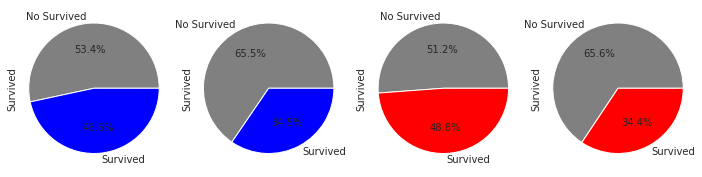

In [41]:
plt.figure(figsize=(12,3))
plt.subplot(141)
plt.axis('equal')
sibsp_df['Survived'].value_counts().plot.pie(labels =['No Survived','Survived'],autopct = '%1.1f%%',colors = ('Grey', 'Blue'))

plt.subplot(142)
plt.axis('equal')
no_sibsp_df['Survived'].value_counts().plot.pie(labels =['No Survived','Survived'],autopct = '%1.1f%%',colors = ('Grey', 'Blue'))

plt.subplot(143)
plt.axis('equal')
parch_df['Survived'].value_counts().plot.pie(labels =['No Survived','Survived'],autopct = '%1.1f%%',colors = ('Grey', 'Red'))

plt.subplot(144)
plt.axis('equal')
no_parch_df['Survived'].value_counts().plot.pie(labels =['No Survived','Survived'],autopct = '%1.1f%%',colors = ('Grey', 'Red'))

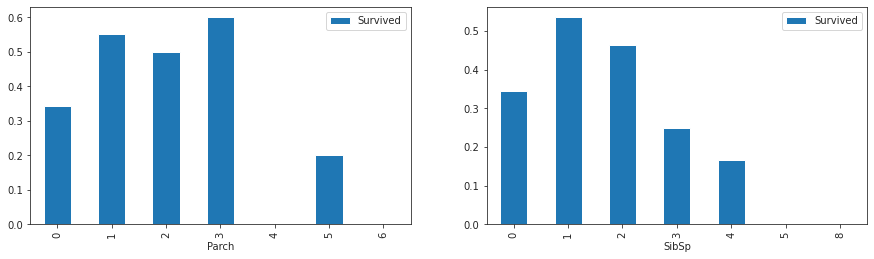

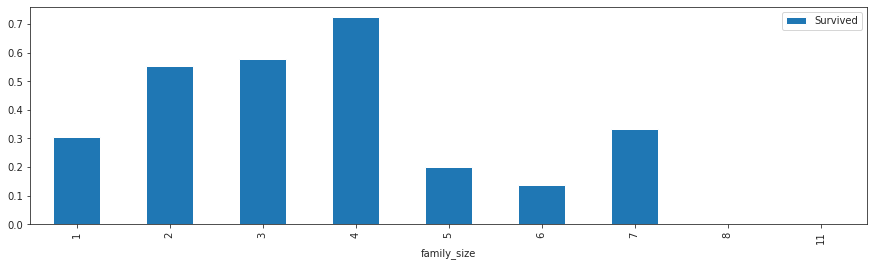

In [44]:
# Relationship between relative numbers and survival rate

fig,ax = plt.subplots(1,2,figsize =(15,4))
train_data[['Parch','Survived']].groupby('Parch').mean().plot.bar(ax = ax[0])
train_data[['SibSp','Survived']].groupby('SibSp').mean().plot.bar(ax = ax[1])


train_data['family_size'] = train_data['Parch']+train_data['SibSp']+1
train_data[['family_size','Survived']].groupby('family_size').mean().plot.bar(figsize =(15,4))


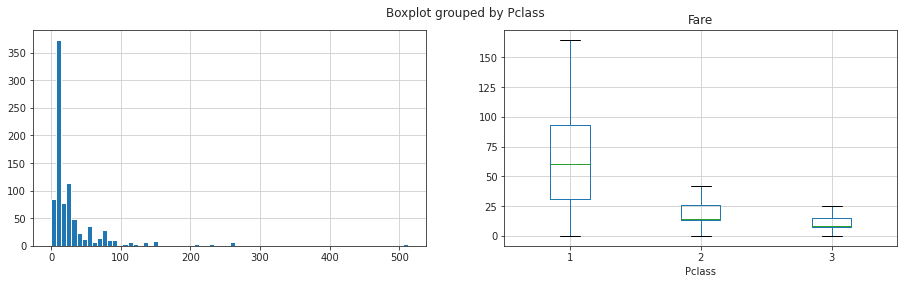

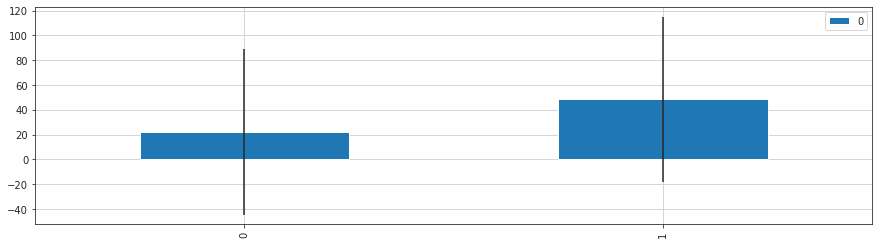

In [50]:
# Compare the fare between survivors and non-survivors

fig,ax = plt.subplots(1,2,figsize =(15,4))
train_data['Fare'].hist(bins =70, ax = ax[0])
train_data.boxplot(column='Fare', by='Pclass', showfliers = False,ax=ax[1])

fare_not_survived = train_data['Fare'][train_data['Survived']==0]
fare_survived = train_data['Fare'][train_data['Survived']==1]

average_fare = pd.DataFrame([fare_not_survived.mean(),fare_survived.mean()])
std_fare = pd.DataFrame([fare_survived.std(),fare_survived.std()])
average_fare.plot(yerr = std_fare, kind = 'bar', figsize = (15,4), grid = True)
 

In [52]:
# Build KNN model

knn_train = train_data[['Survived','Pclass','Sex','Age','Fare','family_size']].dropna()
knn_train['Sex'][knn_train['Sex']=='male']=1
knn_train['Sex'][knn_train['Sex']=='female']=0

test_data['family_size'] = test_data['Parch']+test_data['SibSp']+1
knn_test = test_data[['Pclass','Sex','Age','Fare','family_size']].dropna()
knn_test['Sex'][knn_test['Sex']=='male']=1
knn_test['Sex'][knn_test['Sex']=='female']=0



In [54]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier()
knn.fit(knn_train[['Pclass','Sex','Age','Fare','family_size']],knn_train['Survived'])

knn_test['predict'] = knn.predict(knn_test)
pre_survived = knn_test[knn_test['predict']==1].reset_index()
del pre_survived['index']